###### dataframe dropping multi-level column index
- https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index

# NumPy Basics

### ndarray
> N-dimmensional array object

**Creation Basic**

In [20]:
import numpy as np

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print("arr1:", arr1, arr1.shape, arr1.dtype)

data2 = [[1,2,3,4], [5,6,7,8]]
arr2 = np.array(data2)
print("arr2:", arr2, arr2.shape, arr2.dtype)

np.zeros(10)

np.zeros((3,6))

np.empty((2,3,2))

np.arange(15)

arr1: [ 6.   7.5  8.   0.   1. ] (5,) float64
arr2: [[1 2 3 4]
 [5 6 7 8]] (2, 4) int32


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

**Array creation functions**
- array : list, tuple, array나 다른 sequence type을 ndarray로 바꾼다.
- asarray : ndarray로 바꾸는데, 만약 input이 이미 ndarray라면 바꾸지 않는다.
- arange : python built-in array와 같은 역할을 하는데, output으로 ndarray를 생성한다.
- ones, ones_like : 1을 원소로 갖는 ndarray를 생성한다. ones_like는 다른 ndarray를 input으로 받아 같은 크기와 dtype의 1을 원소로 갖는 ndarray를 생성한다.
- zeros, zeros_like : ones, ones_like와 유사한데 다만 0으로 체운다.
- empty, empty_like : 값을 체우지 않고, 메모리의 garbage를 그대로 사용한다.
- eye, identity : 정방형의 NxN identity matrix를 생성한다.

In [43]:
print(np.ones(4))

data1 = [1, 7, 8, 0, 1]
arr1 = np.array(data1)

print(np.ones_like(arr1))


np.identity(4)*3


[ 1.  1.  1.  1.]
[1 1 1 1 1]


array([[ 3.,  0.,  0.,  0.],
       [ 0.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  0.],
       [ 0.,  0.,  0.,  3.]])

**Using dtype**
>- dtype에는 int8, uint8, int16, uint16, int32, uint32, float16, float32, float64, float128, complex64, complex128, complex256, bool, object, string\_, unicode\_ 들이 있다. 

>- ndarray를 생성할 때 dtype 옵션을 이용해 dtype을 명시할 수 있다.

>- ndarray object의 astype 함수를 이용하여 type변환을 할 수 있다. 특히 문자로 들어온 숫자를 숫자로 변환할 때 유용하다.

In [69]:
arr1 = np.array([1,2,3], dtype=np.float64)
print("arr1:", type(arr1), arr1.dtype)

arr2 = np.array([1,2,3], dtype=np.int32)
print("arr2:", type(arr2), arr2.dtype)

#Casting float64 to complex
arr3 = arr1.astype(np.complex)
print("arr3:", type(arr3), arr3.dtype)

arr_string = np.array(['1.2', '-1.0'], dtype=np.string_)
print(arr_string.dtype)
arr4 = arr_string.astype(np.float32)
print("arr4:", type(arr4), arr4.dtype)



arr1: <class 'numpy.ndarray'> float64
arr2: <class 'numpy.ndarray'> int32
arr3: <class 'numpy.ndarray'> complex128
|S4
arr4: <class 'numpy.ndarray'> float32


**Operations between arrays and scalars**

In [75]:
arr = np.array([[1,2,3],[4,5,6]])
print(arr, "\n")
print(arr*arr, "\n")
print(arr - arr, "\n")
print(1/arr, "\n")

[[1 2 3]
 [4 5 6]] 

[[ 1  4  9]
 [16 25 36]] 

[[0 0 0]
 [0 0 0]] 

[[ 1.          0.5         0.33333333]
 [ 0.25        0.2         0.16666667]] 



**Basic Indexing and Slicing**

주의할 점은 arr[5:8]은 단지 view를 제공하는 것이라는 것 이다.

따라서
```Python
arr_slice = arr[5:8]
```
위 코드는 arr의 6, 7, 8 번째 element를 arr_slice로 복사하는 것이 아니라는 것이다. 대신 arr에 대한 reference를 return하는데, 그 시작 pointer가 arr[5]를 가리키게 된다.

이런 이유로 
```Python
arr_slice[:] = 12
```
를 하게 될 경우 원본인 arr의 [5:8] element가 12로 바뀐다.

In [16]:
arr = np.arange(10)
print(arr)

#getting values of index 5, 6, 7 that is 6th, 7th and 8th element of arr
print(arr[5:8])

arr_slice = arr[5:8]
print(arr_slice)

arr_slice[:] = 12

arr


[0 1 2 3 4 5 6 7 8 9]
[5 6 7]
[5 6 7]


array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**Indexing with slices**

기초적인 것 이지만.. 2d matrix에서 [:2]를 사용할 경우 0, 1번째 row를 선택하게 된다.

In [20]:
arr2d = np.array([[1,2,3],[4,5,6],[6,7,8]])
print(arr2d)

arr2d[:2]


[[1 2 3]
 [4 5 6]
 [6 7 8]]


array([[1, 2, 3],
       [4, 5, 6]])

**Boolean Indexing**

주의할 점은 앞서 arr[5:8]과 달리 array에 대한 boolean indexing을 할 경우 항상 copy가 생성된다는 것이다. 따라서 아래와 같이 data2를 수정해도 data가 바뀌지 않는다.

In [38]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
data2 = data[names=='Bob']
data2
data2[0] = 1
data

array([[  1.64408886e+00,   1.67907421e+00,   9.09734482e-01,
          3.45504797e-01],
       [  9.15718721e-01,   4.18824955e-01,  -1.54919964e+00,
          1.58616791e-01],
       [ -1.16526733e+00,   6.39432127e-01,   2.08653775e-01,
         -4.92445898e-01],
       [ -2.76896246e-01,  -5.85797819e-01,  -1.18035344e-03,
          5.98449787e-01],
       [ -9.47526453e-01,   2.38675816e+00,  -4.30811645e-01,
         -3.62050227e-01],
       [ -1.57836262e+00,   1.62195728e+00,  -6.14852065e-02,
         -2.38294318e+00],
       [ -8.91099542e-01,  -1.08305486e+00,  -2.17272009e+00,
         -4.83764346e-02]])

**Fancy Indexing**

Fancy Indexing은 integer array를 이용한 index을 말한다. 예를들어 아래와 같이 arr[]의 index argument로 [2,1]과 같은 list를 줄 경우 2번째 그리고 1번째 row를 선택하게 된다. 또한 만약 list element가 음수일 경우 끝 row혹은 column부터 카운트 해서 해당 row혹은 column을 가져온다. 예를들어 [-3]은 뒤에서부터 3번째 row를 가져오는 것이다.

앞서 boolean indexing과 마찬가지로 fancy indexing은 copy를 생성한다.

In [45]:
arr = np.empty((8, 4))
arr
for i in range(8):
    arr[i] = i
    
arr

arr[[2,1]]



array([[ 2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.]])

**Transposeing Arrays and Swapping Axes**

ndarray object의 T 함수를 사용하면 transpose가 된다. transpose함수를 사용하여 axis의 순서를 바꿀 수 있는데, T함수는 transpose함수에서 (n, n-1, ..., 1)을 준 경우라고 할 수 있다.

In [65]:
arr = np.arange(16).reshape((2,2,4))
print(arr, "\n------------\n")
print(arr.T, "\n-------------\n")

print(arr.transpose((2, 1, 0)))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]] 
------------

[[[ 0  8]
  [ 4 12]]

 [[ 1  9]
  [ 5 13]]

 [[ 2 10]
  [ 6 14]]

 [[ 3 11]
  [ 7 15]]] 
-------------

[[[ 0  8]
  [ 4 12]]

 [[ 1  9]
  [ 5 13]]

 [[ 2 10]
  [ 6 14]]

 [[ 3 11]
  [ 7 15]]]


**Universal Functions:Fast Element-wise Array Functions**

Unary ufunction과 Binary ufunction이 있다.


**Data Processing Using Arrays**

meshgrid???

In [96]:

points1 = np.arange(1, 5, 1)
points2 = np.arange(10, 7, -1)
xs, ys = np.meshgrid(points1, points2)
xs



array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

**Expressing Conditional Logic as Array Operations**

#Pandas Data Structure 

###### Rank1 array
> shape이 (?, ) 인 녀석을 rank1 array라 한다. maxtix를 rank1 array로 바꾸려면 ravel() 함수를 쓰면 된다.

In [16]:
import numpy as np

x = np.random.uniform(size=(1, 5))
x.shape

(1, 5)

In [17]:
y = x.ravel()
y

array([ 0.40285942,  0.51546289,  0.74922749,  0.47925214,  0.51303614])

In [18]:
y.shape

(5,)

###### 차원 복재
> np.newaxis로 값이 1인 차원을 추가하고, reps에 각 차원을 몇번 복재할지 지정한다.

In [23]:
import numpy as np

z = np.tile(y[np.newaxis, np.newaxis, :], reps=(2, 3, 1))
z

array([[[ 0.40285942,  0.51546289,  0.74922749,  0.47925214,  0.51303614],
        [ 0.40285942,  0.51546289,  0.74922749,  0.47925214,  0.51303614],
        [ 0.40285942,  0.51546289,  0.74922749,  0.47925214,  0.51303614]],

       [[ 0.40285942,  0.51546289,  0.74922749,  0.47925214,  0.51303614],
        [ 0.40285942,  0.51546289,  0.74922749,  0.47925214,  0.51303614],
        [ 0.40285942,  0.51546289,  0.74922749,  0.47925214,  0.51303614]]])

In [24]:
z.shape

(2, 3, 5)

### numpy - pad

- https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.pad.html
- CNN에서 padding할 때 사용

- Parameters
 - array: padding할 array
 - pad_width: 각 axis마다 (좌측에 몇개, 우측에 몇개) padding할지를 지정한다. 
 - mode: 'constant' 만 써봄. 

- axis 순서는 가장 바깥쪽부터 list에 element를 append하는 것 처럼 순차적으로 padding 한다.

In [22]:
ts2 = np.array([1, 1, 1])
ts2

array([1, 1, 1])

In [23]:
np.pad(ts2, (2, 3), 'constant', constant_values=(2, 3))

array([2, 2, 1, 1, 1, 3, 3, 3])

> 아래 코드에서는 0번째 axis의 좌측에 6을 1개 우측에 7을 2개, 1번째 axis의 좌측에 8을 4개 우측에 9를 5개 padding 하고 있다.

In [20]:
ts1 = np.array([[1, 1, 1, 1], [2, 2, 2, 2]]); ts1

array([[1, 1, 1, 1],
       [2, 2, 2, 2]])

In [21]:
np.pad(ts1, ((1, 2), (4,5)), 'constant', constant_values = ((6, 7), (8, 9)))

array([[8, 8, 8, 8, 6, 6, 6, 6, 9, 9, 9, 9, 9],
       [8, 8, 8, 8, 1, 1, 1, 1, 9, 9, 9, 9, 9],
       [8, 8, 8, 8, 2, 2, 2, 2, 9, 9, 9, 9, 9],
       [8, 8, 8, 8, 7, 7, 7, 7, 9, 9, 9, 9, 9],
       [8, 8, 8, 8, 7, 7, 7, 7, 9, 9, 9, 9, 9]])

### numpy -  Matrix multiplication and product with other
- multiplication과 product는 다르다.
- multiplication은 곱셈연산자나 np.multiply를 사용해야한다.
- product는 np.dot을 사용한다.

In [44]:
X = np.array([[1, 1, 1], [2, 2, 2]])  # (2, 3)
Y = np.array([[0.1, 0.1, 0.1], [0.01, 0.01, 0.01]])  # (2, 3)
Z = np.array([[0.1, 0.1], [0.2, 0.2], [0.3, 0.3]])  # (3, 2)
print('X.shape:{}, Y.shape:{}, Z.shape:{}'.format(X.shape, Y.shape, Z.shape))

X.shape:(2, 3), Y.shape:(2, 3), Z.shape:(3, 2)


In [45]:
X*Y

array([[ 0.1 ,  0.1 ,  0.1 ],
       [ 0.02,  0.02,  0.02]])

In [46]:
np.multiply(X, Y)

array([[ 0.1 ,  0.1 ,  0.1 ],
       [ 0.02,  0.02,  0.02]])

In [47]:
# error because of shape miss match
np.multiply(X, Z)

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [48]:
np.dot(X, Z)

array([[ 0.6,  0.6],
       [ 1.2,  1.2]])

In [49]:
# error because of shape miss match
np.dot(X, Y)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

### numpy - Matrix sum itself

In [50]:
X = np.array([[1, 1, 1], [2, 2, 2]])  # (2, 3)

In [56]:
s1 = np.sum(X, axis=0, keepdims=True)  # (1, 3)
print(s1, s1.shape)

[[3 3 3]] (1, 3)


In [58]:
s2 = np.sum(X, axis=0, keepdims=False)  # (3, )
print(s2, s2.shape)

[3 3 3] (3,)


In [65]:
# if don't specify axis, then will sum all of the elements
np.sum(X)

9

### numpy - Matrix sum with other

In [61]:
X = np.array([[1, 1, 1], [2, 2, 2]])  # (2, 3)
Y = np.array([[0.1, 0.1, 0.1], [0.01, 0.01, 0.01]])  # (2, 3)
K = np.array([1])

In [62]:
X + Y

array([[ 1.1 ,  1.1 ,  1.1 ],
       [ 2.01,  2.01,  2.01]])

In [63]:
X + K

array([[2, 2, 2],
       [3, 3, 3]])

### numpy - zeros
- https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html

- Parameters
 - shape : 결과의 shape
 - dtype : 결과 element의 data-type
 - order : ?

In [2]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [3]:
np.zeros((2, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

.

### numpy - max, mean

In [22]:
X = np.ones((2, 3, 4)); X.shape

(2, 3, 4)

In [29]:
Y = np.max(X, axis=(1, 2)); Y

array([ 1.,  1.])

In [30]:
Y.shape

(2,)

### numpy.tile(A, reps)
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html
- A를 reps만큼 반복한다.
 - A: array_like
 - reps : array_list(optional)

In [9]:
import numpy as np

a = np.array([0, 1, 2])
print('a:', a, a.shape)

np.tile(a, reps=(1, 2, 3, 4)).shape

a: [0 1 2] (3,)


(1, 2, 3, 12)

# pandas DataFrame

Let's create simple DataFrame from random numbers

In [1]:
import pandas as pd
import numpy as np

ts = pd.DataFrame()
rs = np.random.RandomState(123)

# You have to insert Ndarray(numpy array)
ts['a'] = np.round(rs.normal(1,2,7))
ts['b'] = np.linspace(start=5, stop=10, num=7, dtype='int32')
ts['c'] = np.arange(start=10, stop=3, step=-1, dtype='float')
ts['d'] = np.array([1,2,3,np.nan,5,6,np.nan])

ts

,a,b,c,d
0,-1,5,10,1
1,3,5,9,2
2,2,6,8,3
3,-2,7,7,NaN
4,0,8,6,5
5,4,9,5,6
6,-4,10,4,NaN


How to preview a part of a large dataFrame?

In [2]:
ts.head()

,a,b,c,d
0,-1,5,10,1
1,3,5,9,2
2,2,6,8,3
3,-2,7,7,NaN
4,0,8,6,5


In [4]:
ts.head(3)

,a,b,c,d
0,-1,5,10,1
1,3,5,9,2
2,2,6,8,3


In [3]:
ts[:3]

,a,b,c,d
0,-1,5,10,1
1,3,5,9,2
2,2,6,8,3


Max operation

In [32]:
ts.max() #same as ts.max(axis=0)
# min, sum, count

a     4
b    10
c    10
d     6
dtype: float64

In [33]:
ts.max(axis=1)

0    10
1     9
2     8
3     7
4     8
5     9
6    10
dtype: float64

Deleting row

In [34]:
ts.drop([3])

,a,b,c,d
0,-1,5,10,1
1,3,5,9,2
2,2,6,8,3
4,0,8,6,5
5,4,9,5,6
6,-4,10,4,NaN


In [35]:
ts.drop(['b'], axis=1)

,a,c,d
0,-1,10,1
1,3,9,2
2,2,8,3
3,-2,7,NaN
4,0,6,5
5,4,5,6
6,-4,4,NaN


In [36]:
ts

,a,b,c,d
0,-1,5,10,1
1,3,5,9,2
2,2,6,8,3
3,-2,7,7,NaN
4,0,8,6,5
5,4,9,5,6
6,-4,10,4,NaN


In [37]:
ts.drop(['b'], axis=1, inplace=True)
ts

,a,c,d
0,-1,10,1
1,3,9,2
2,2,8,3
3,-2,7,NaN
4,0,6,5
5,4,5,6
6,-4,4,NaN


In [41]:
ts1 = pd.DataFrame()
ts1['max'] = ts.max()
ts1['sum'] = ts.sum()
ts1['count'] = ts.count()
ts1['nan'] = ts.isnull().sum() #count nan values
ts1

,max,sum,count,nan
a,4,2,7,0
c,10,49,7,0
d,6,17,5,2


In [41]:
ts1[['max', 'sum']].max()

max    10
sum    30
dtype: float64

In [39]:
ts1[['max', 'sum']].max(axis=1)

a     4
c    49
d    17
dtype: float64

In [14]:
import numpy as np
import pandas as pd

cols = pd.MultiIndex.from_tuples([("a", "b"), ("a", "c")])
df = pd.DataFrame([[1,2], [3,4]], columns=cols)
df

a   
   b  c
0  1  2
1  3  4

In [15]:
df.columns = df.columns.droplevel()

In [16]:
df

,b,c
0,1,2
1,3,4


###### dataframe drop index

In [5]:
import numpy as np
import pandas as pd

df = pd.DataFrame([
    ('bird',    389.0),
    ('bird',     24.0),
    ('mammal',   80.5),
    ('mammal', np.nan)],
    index=['falcon', 'parrot', 'lion', 'monkey'],
    columns=('class', 'max_speed'))

In [6]:
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [7]:
df.reset_index()

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [1]:
###### Iterating over ndarray

In [2]:
import numpy as np


a = np.array([[1,2],[3,4],[5,6]])

for (x,y), value in np.ndenumerate(a):
    print(x, y, value)

0 0 1
0 1 2
1 0 3
1 1 4
2 0 5
2 1 6


### df to dict

In [6]:
import numpy as np
import pandas as pd
import pandasql as ps


df = pd.DataFrame([[1234, 'Customer A', '123 Street', np.nan],
               [1234, 'Customer A', np.nan, '333 Street'],
               [1233, 'Customer B', '444 Street', '333 Street'],
              [1233, 'Customer B', '444 Street', '666 Street']], columns=
['ID', 'Customer', 'Billing Address', 'Shipping Address'])

df

,ID,Customer,Billing Address,Shipping Address
0,1234,Customer A,123 Street,NaN
1,1234,Customer A,NaN,333 Street
2,1233,Customer B,444 Street,333 Street
3,1233,Customer B,444 Street,666 Street


In [9]:
# method 1
{row[0]: row[1] for row in df.values}

{1233: 'Customer B', 1234: 'Customer A'}

In [11]:
# another method
df.to_dict()

{'Billing Address': {0: '123 Street',
  1: nan,
  2: '444 Street',
  3: '444 Street'},
 'Customer': {0: 'Customer A',
  1: 'Customer A',
  2: 'Customer B',
  3: 'Customer B'},
 'ID': {0: 1234, 1: 1234, 2: 1233, 3: 1233},
 'Shipping Address': {0: nan,
  1: '333 Street',
  2: '333 Street',
  3: '666 Street'}}

### SQL query on pandas DataFrame

In [4]:
import numpy as np
import pandas as pd
import pandasql as ps


df = pd.DataFrame([[1234, 'Customer A', '123 Street', np.nan],
               [1234, 'Customer A', np.nan, '333 Street'],
               [1233, 'Customer B', '444 Street', '333 Street'],
              [1233, 'Customer B', '444 Street', '666 Street']], columns=
['ID', 'Customer', 'Billing Address', 'Shipping Address'])

df

,ID,Customer,Billing Address,Shipping Address
0,1234,Customer A,123 Street,NaN
1,1234,Customer A,NaN,333 Street
2,1233,Customer B,444 Street,333 Street
3,1233,Customer B,444 Street,666 Street


In [5]:
ps.sqldf('select ID from df', locals())

,ID
0,1234
1,1234
2,1233
3,1233


###### Pivot dataframe

In [2]:
import pandas as pd
import numpy as np

ts = pd.DataFrame()
rs = np.random.RandomState(123)

# You have to insert Ndarray(numpy array)
ts['year'] = [2000, 2001, 2002, 2003, 2003, 2003, 2004]
ts['country'] = ['kr', 'us', 'jp', 'kr', 'eu', 'jp', 'jp']
ts['divers'] = np.linspace(start=5, stop=10, num=7, dtype='int32')
ts['revenue'] = np.arange(start=10, stop=3, step=-1, dtype='float')
ts['quant'] = np.array([1,2,3,np.nan,5,6,np.nan])

ts

,year,country,divers,revenue,quant
0,2000,kr,5,10.0,1.0
1,2001,us,5,9.0,2.0
2,2002,jp,6,8.0,3.0
3,2003,kr,7,7.0,NaN
4,2003,eu,8,6.0,5.0
5,2003,jp,9,5.0,6.0
6,2004,jp,10,4.0,NaN


In [9]:
tsp = ts.pivot_table(
    values='revenue',  # numeric column
    index='country',  # group by what?
    columns='year',  # create columns for
    aggfunc='sum'  # if there are multiple values
)
tsp

year,2000,2001,2002,2003,2004
country,,,,,
eu,NaN,NaN,NaN,6.0,NaN
jp,NaN,NaN,8.0,5.0,4.0
kr,10.0,NaN,NaN,7.0,NaN
us,NaN,9.0,NaN,NaN,NaN


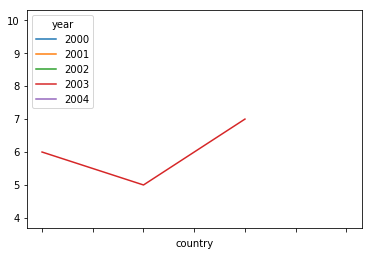

In [8]:
import matplotlib.pyplot as plt
tsp.plot()
plt.show()

###### plotting DataFrame

> - https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot

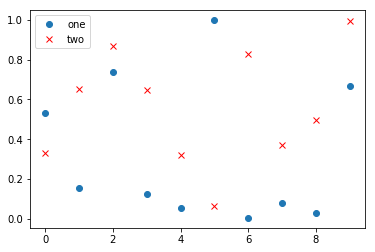

In [10]:
import numpy as np
import pandas as pd

d = {'one' : np.random.rand(10),
     'two' : np.random.rand(10)}

df = pd.DataFrame(d)

df.plot(style=['o','rx'])

All the accepted style formats are listed in the documentation of matplotlib.pyplot.plot.
> https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot